<a href="https://colab.research.google.com/github/Alona-Aldushyna/Alona-Aldushyna-s-the-Capstone-Project/blob/main/vgg-16_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.15.0
Hub version: 0.16.1
GPU is available


In [2]:
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D

In [3]:
from keras.preprocessing import image
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/MyDrive/validation')

math_formulas_types = os.listdir('/content/drive/MyDrive/validation')
print (math_formulas_types)  #what kinds of rooms are in this dataset

print("Types of math formulas found: ", len(dataset_path))

['8_jpg', '9_jpg', '4_jpg', '+_jpg', '-_jpg', '6_jpg', '=_jpg', '7_jpg', 'dev_jpg', '5_jpg', '1_jpg', '2_jpg', '3_jpg', '0_jpg']
Types of math formulas found:  14


In [5]:
# Задайте путь к директории
directory_path = '/content/drive/MyDrive/validation'

# Используйте команду shell для удаления файлов .DS_Store
os.system(f'find {directory_path} -name ".DS_Store" -delete')

0

In [6]:
formulas = []

for item in math_formulas_types:
 # Get all the file names
 all_formulas = os.listdir('/content/drive/MyDrive/validation' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for formula in  all_formulas:
    formulas.append((item, str('/content/drive/MyDrive/validation' + '/' +item) + '/' + formula))
    print(formulas)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
# Build a dataframe
formulas_df = pd.DataFrame(data=formulas, columns=['formulas type', 'image'])
print(formulas_df.head())

  formulas type                                              image
0         8_jpg  /content/drive/MyDrive/validation/8_jpg/aug_0_...
1         8_jpg  /content/drive/MyDrive/validation/8_jpg/aug_0_...
2         8_jpg  /content/drive/MyDrive/validation/8_jpg/aug_0_...
3         8_jpg  /content/drive/MyDrive/validation/8_jpg/aug_0_...
4         8_jpg  /content/drive/MyDrive/validation/8_jpg/aug_0_...


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Путь к месту сохранения в Google Drive
save_path = '/content/drive/MyDrive/formulas.csv'

# Сохранение DataFrame в CSV файл
formulas_df.to_csv(save_path, index=False)

In [10]:
import cv2
path = '/content/drive/MyDrive/validation/'


im_size = 300

images = []
labels = []

for i in math_formulas_types:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [11]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(9156, 300, 300, 3)

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Предположим, что y - это одномерный массив меток классов (14 классов)
y = formulas_df['formulas type'].values

# Используем LabelEncoder для преобразования строковых меток в числовой формат
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Используем OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
Y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

print(Y_onehot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
# Создание DataFrame для закодированных меток
encoded_labels_df = pd.DataFrame(Y_onehot, columns=[f'Class_{i}' for i in range(Y_onehot.shape[1])])

# Сохранение DataFrame в файл
#encoded_labels_df.to_csv('/content/drive/MyDrive/encoded.csv', index=False)
# Объединение исходного DataFrame с DataFrame закодированных меток
final_df = pd.concat([formulas_df, encoded_labels_df], axis=1)

# Сохранение DataFrame в файл
final_df.to_csv('/content/drive/MyDrive/final_dataset.csv', index=False)

In [14]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y_onehot = shuffle(images, Y_onehot, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y_onehot, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(8698, 300, 300, 3)
(8698, 14)
(458, 300, 300, 3)
(458, 14)


In [15]:
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D


In [16]:
def VGGupdated(input_tensor=None,classes=14):

    img_rows, img_cols = 300, 300   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)

    img_input = Input(shape=img_dim)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)


    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)


    # Create model.


    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model

In [17]:
model = VGGupdated(classes = 14) #

In [18]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
import matplotlib.pyplot as plt

def plot_training(history):
    # Получаем значения точности и потерь из истории обучения
    acc = history.history['accuracy']
    loss = history.history['loss']

    # Получаем значения точности и потерь из истории валидации, если они доступны
    if 'val_accuracy' in history.history and 'val_loss' in history.history:
        val_acc = history.history['val_accuracy']
        val_loss = history.history['val_loss']

    # Строим графики точности и потерь
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, loss, 'r', label='Training loss')

    if 'val_accuracy' in history.history and 'val_loss' in history.history:
        plt.plot(epochs, val_acc, 'b--', label='Validation accuracy')
        plt.plot(epochs, val_loss, 'r--', label='Validation loss')

    plt.title('Training and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy/Loss')
    plt.legend()
    plt.show()

In [20]:
history_2 = model.fit(train_x, train_y, epochs=10, batch_size=20)

Epoch 1/10
435/435 [==============================] - 49s 81ms/step - loss: 2.2233 - accuracy: 0.2045
Epoch 2/10
435/435 [==============================] - 30s 69ms/step - loss: 1.4109 - accuracy: 0.4870
Epoch 3/10
435/435 [==============================] - 30s 70ms/step - loss: 0.9195 - accuracy: 0.6742
Epoch 4/10
435/435 [==============================] - 30s 69ms/step - loss: 0.5900 - accuracy: 0.7966
Epoch 5/10
435/435 [==============================] - 30s 69ms/step - loss: 0.3955 - accuracy: 0.8708
Epoch 6/10
435/435 [==============================] - 30s 69ms/step - loss: 0.2449 - accuracy: 0.9218
Epoch 7/10
435/435 [==============================] - 30s 69ms/step - loss: 0.1712 - accuracy: 0.9394
Epoch 8/10
435/435 [==============================] - 30s 69ms/step - loss: 0.1223 - accuracy: 0.9615
Epoch 9/10
435/435 [==============================] - 30s 69ms/step - loss: 0.0905 - accuracy: 0.9708
Epoch 10/10
435/435 [==============================] - 30s 69ms/step - loss: 0.058

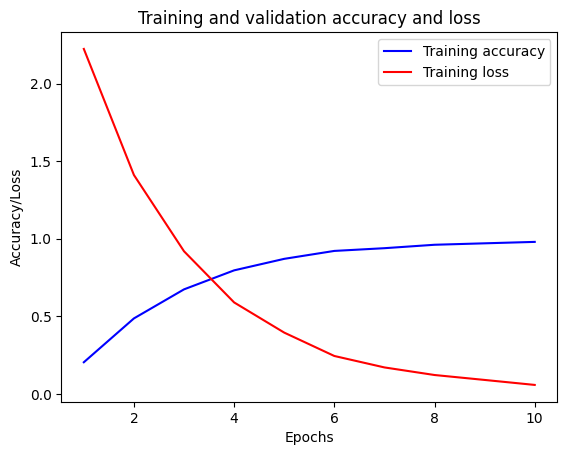

In [21]:
# Визуализируем точность и потери
plot_training(history_2)

In [22]:
model.save('/content/drive/MyDrive/my_model_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from sklearn.metrics import classification_report

# Получение предсказаний модели на тестовых данных
y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_y, axis=1)

# Вывод отчета о классификации
print(classification_report(y_true, y_pred_classes))


15/15 [==============================] - 4s 91ms/step
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.94      0.94      0.94        36
           2       0.97      0.92      0.94        37
           3       0.71      0.94      0.81        16
           4       0.85      0.92      0.89        38
           5       1.00      0.93      0.96        28
           6       0.67      0.85      0.75        26
           7       0.80      0.91      0.85        47
           8       0.85      0.82      0.84        28
           9       0.97      0.94      0.96        36
          10       1.00      0.79      0.88        28
          11       1.00      0.83      0.91        30
          12       1.00      0.91      0.95        33
          13       1.00      0.91      0.96        47

    accuracy                           0.90       458
   macro avg       0.90      0.90      0.90       458
weighted avg       0.91   

Input image shape: (1, 300, 300, 3)


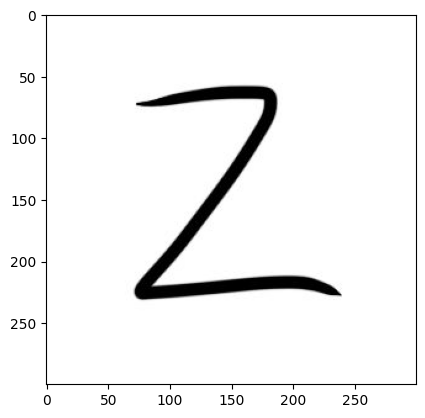

In [24]:
from tensorflow.keras.preprocessing import image
from PIL import Image
from matplotlib.pyplot import imread, imshow

img_path = '/content/drive/MyDrive/test/2.jpg'

img = Image.open(img_path)
img = img.resize((300, 300))  # Если требуется изменить размер изображения
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [25]:
print(model.predict(x))

1/1 [==============================] - 0s 493ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [26]:
# Получить предсказанный вектор вероятностей для классов
predicted_probabilities = model.predict(x)

# Преобразовать предсказанный вектор вероятностей из формата One-Hot в числовой формат
predicted_class_numeric = np.argmax(predicted_probabilities, axis=1)

# Обратное преобразование числовых меток в строковый формат с использованием label_encoder
predicted_class_str = label_encoder.inverse_transform(predicted_class_numeric)

# Вывести предсказанный класс
print("Predicted class:", predicted_class_str[0])

1/1 [==============================] - 0s 23ms/step
Predicted class: 2_jpg


In [30]:
import os

# Папка с изображениями
folder_path = '/content/drive/MyDrive/test/'

# Получение списка файлов изображений в папке
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Перебор каждого изображения в папке
for img_path in image_files:
    # Загрузка изображения
    img = Image.open(img_path)
    img = img.resize((300, 300))  # Если требуется изменить размер изображения
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Предсказание класса
    predicted_probabilities = model.predict(x)
    predicted_class_numeric = np.argmax(predicted_probabilities, axis=1)
    predicted_class_str = label_encoder.inverse_transform(predicted_class_numeric)

    # Вывод результата
    print("Image:", img_path)
    print("Predicted class:", predicted_class_str[0])

1/1 [==============================] - 0s 26ms/step
Image: /content/drive/MyDrive/test/1.jpg
Predicted class: +_jpg
1/1 [==============================] - 0s 21ms/step
Image: /content/drive/MyDrive/test/2.jpg
Predicted class: 2_jpg
1/1 [==============================] - 0s 20ms/step
Image: /content/drive/MyDrive/test/=.jpg
Predicted class: =_jpg
1/1 [==============================] - 0s 20ms/step
Image: /content/drive/MyDrive/test/+.jpg
Predicted class: +_jpg
1/1 [==============================] - 0s 20ms/step
Image: /content/drive/MyDrive/test/7.jpg
Predicted class: 7_jpg
1/1 [==============================] - 0s 21ms/step
Image: /content/drive/MyDrive/test/div.jpg
Predicted class: =_jpg
1/1 [==============================] - 0s 21ms/step
Image: /content/drive/MyDrive/test/6.jpg
Predicted class: 6_jpg
1/1 [==============================] - 0s 20ms/step
Image: /content/drive/MyDrive/test/9.jpg
Predicted class: 9_jpg
1/1 [==============================] - 0s 20ms/step
Image: /content/dr

1/1 [==============================] - 0s 21ms/step


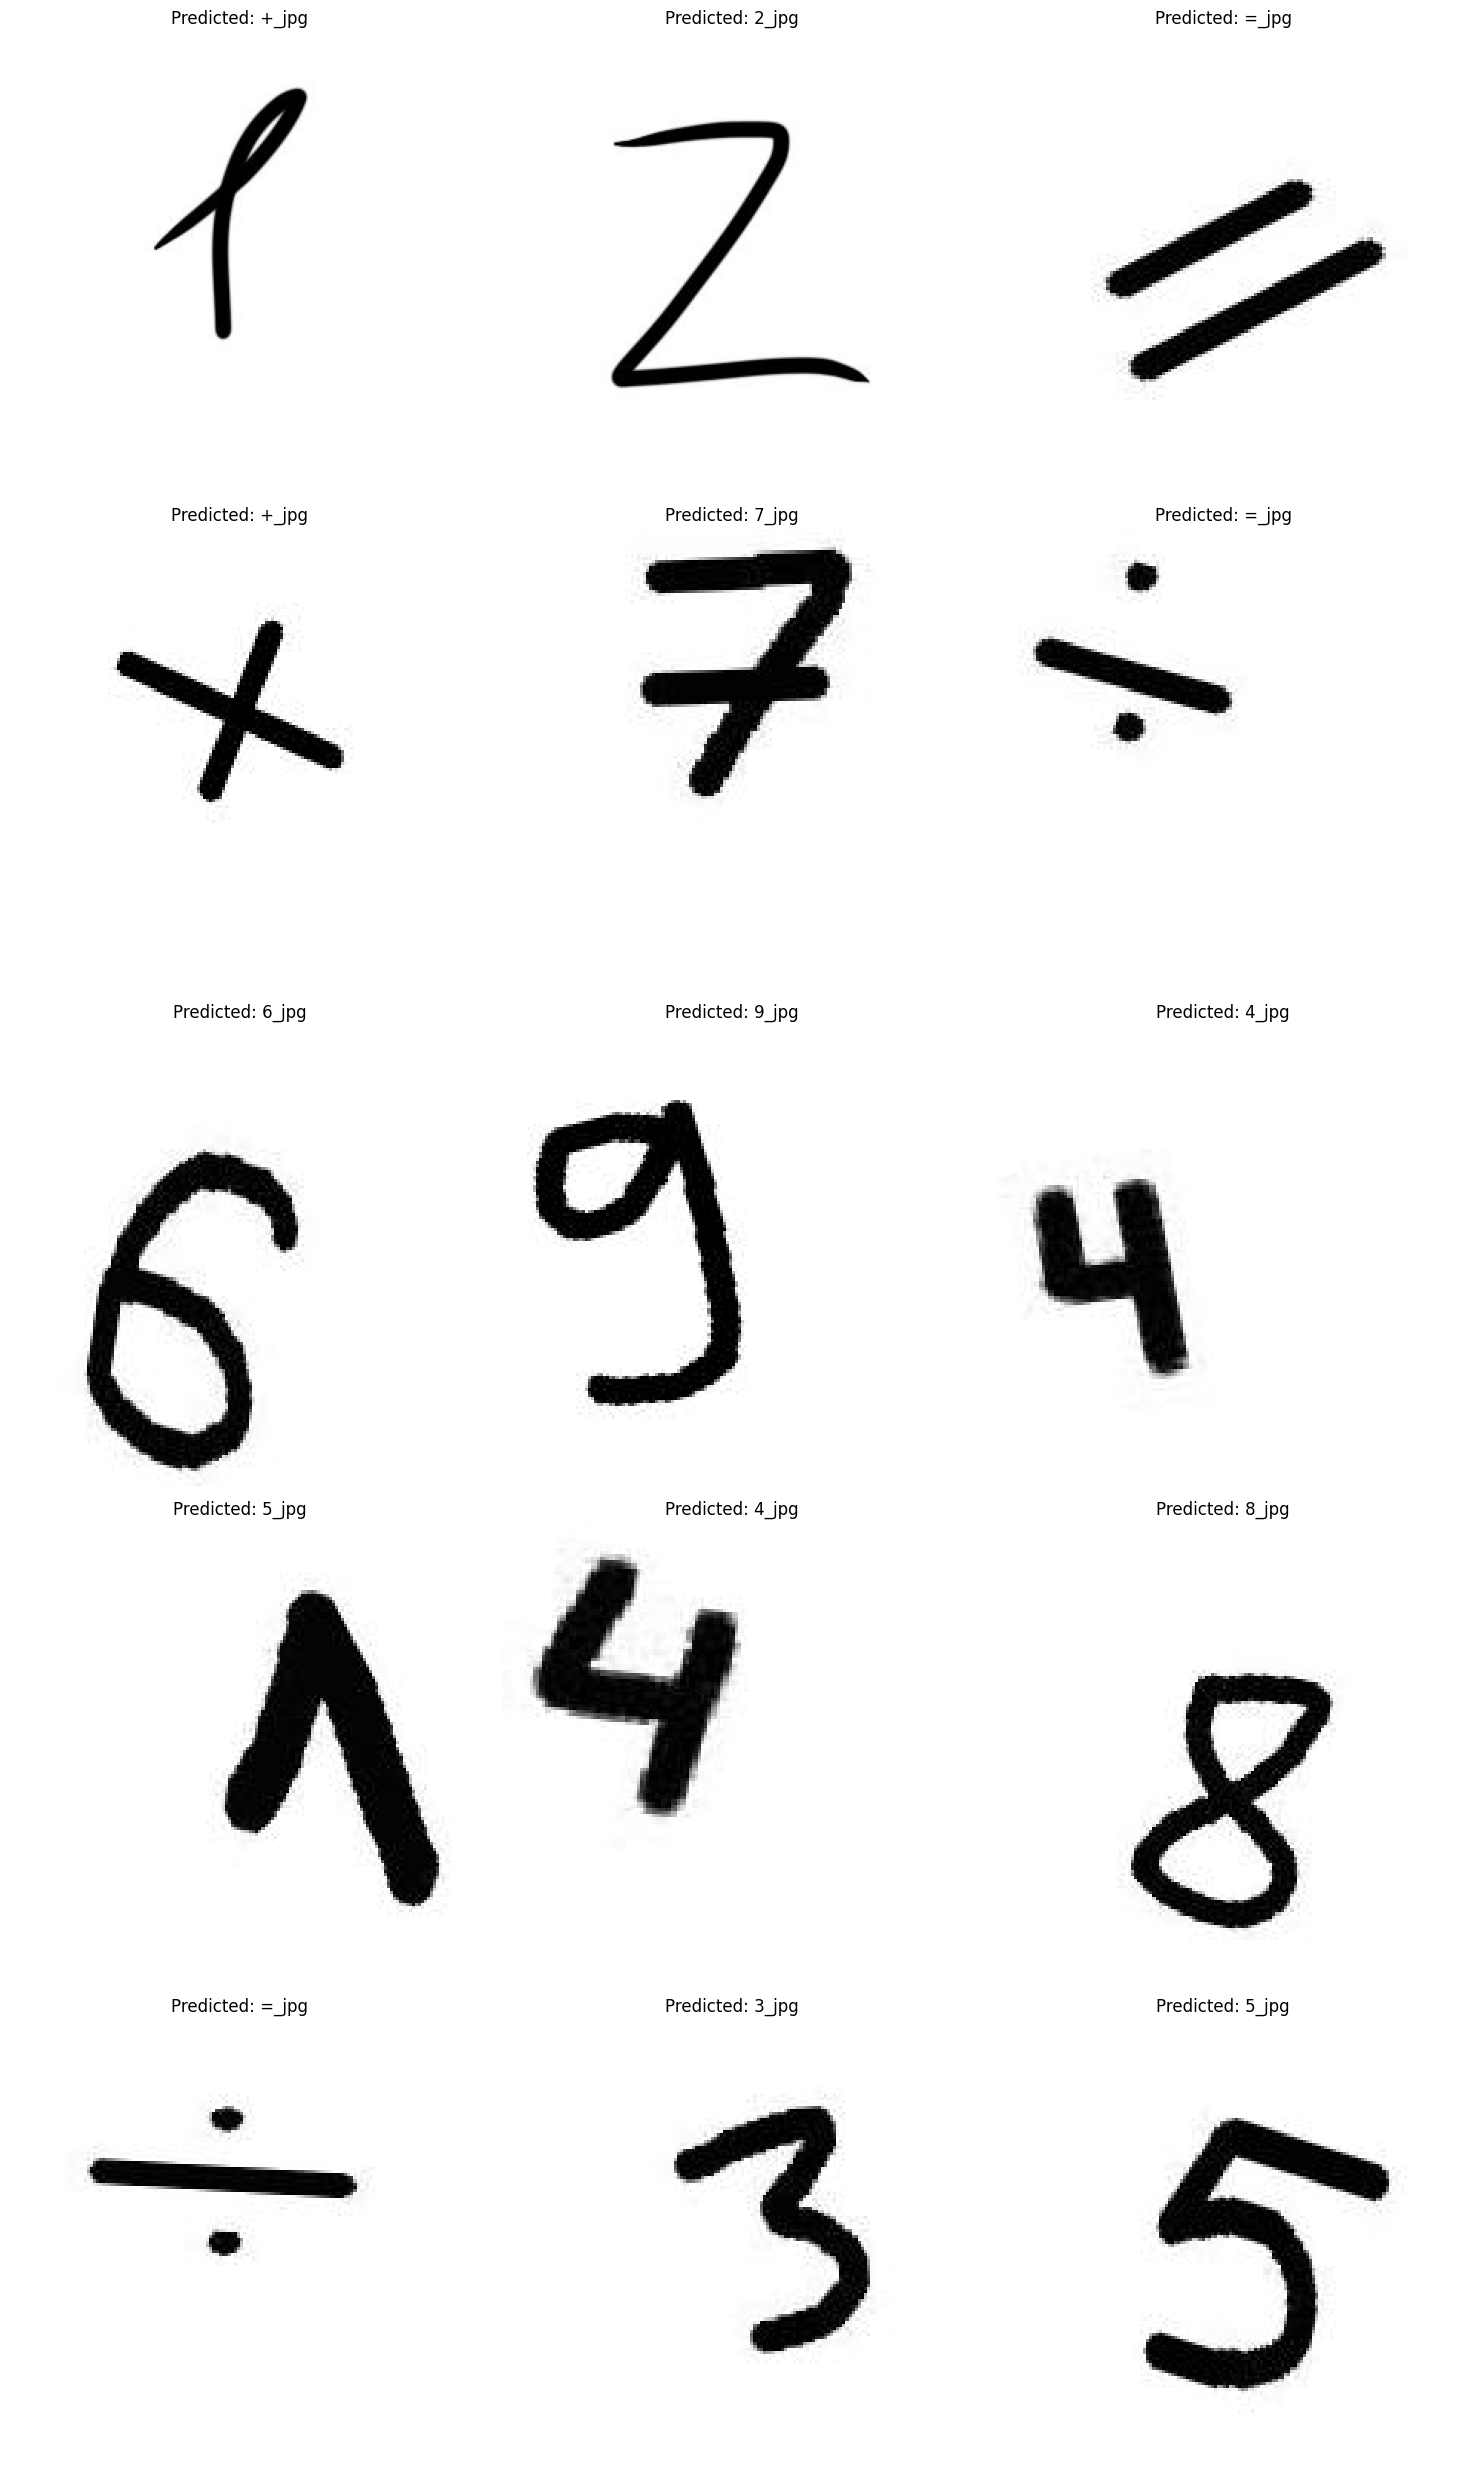

In [31]:
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

# Папка с изображениями
folder_path = '/content/drive/MyDrive/test/'

# Создание сетки для изображений
num_images = len(image_files)
num_rows = int(np.ceil(num_images / 3))
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Перебор каждого изображения в папке
for i, img_path in enumerate(image_files):
    # Загрузка и отображение изображения
    img = imread(img_path)
    ax = axes[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')

    # Загрузка изображения и подготовка к передаче в модель
    img = Image.open(img_path)
    img = img.resize((300, 300))  # Если требуется изменить размер изображения
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Предсказание класса
    predicted_probabilities = model.predict(x)
    predicted_class_numeric = np.argmax(predicted_probabilities, axis=1)
    predicted_class_str = label_encoder.inverse_transform(predicted_class_numeric)

    # Вывод результата предсказания
    ax.set_title(f'Predicted: {predicted_class_str[0]}')

plt.tight_layout()
plt.show()
